# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [97]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [99]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

cityweather = []
lat = []
lng = []
temp = []
windspeed = []
cloudiness = []
humidity = [] 
id_city = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        id_city.append(response['id'])
        cityweather.append(city)
        print(f"The city being processed is: {city} | {response['id']}")
    except:
        pass



The city being processed is: laguna | 5364271
The city being processed is: clyde river | 5924351
The city being processed is: port elizabeth | 964420
The city being processed is: saint-joseph | 6690296
The city being processed is: blagoveshchenka | 1509999
The city being processed is: foki | 562580
The city being processed is: kapaa | 5848280
The city being processed is: sitka | 5557293
The city being processed is: ponta do sol | 2264557
The city being processed is: bandarbeyla | 64814
The city being processed is: castro | 3466704
The city being processed is: yellowknife | 6185377
The city being processed is: san jose | 5392171
The city being processed is: airai | 1651810
The city being processed is: khatanga | 2022572
The city being processed is: ushuaia | 3833367
The city being processed is: tuatapere | 2180815
The city being processed is: lagoa | 3372964
The city being processed is: nikolskoye | 546105
The city being processed is: ahipara | 2194098
The city being processed is: huarm

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [102]:

weather_dict = {
    "City": cityweather,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Wind Speed": windspeed,
    "Cloudiness": cloudiness,
    "Humidity": humidity 
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Wind Speed,Cloudiness,Humidity
0,laguna,38.42,-121.42,6.11,1.59,1,70
1,clyde river,70.47,-68.59,-29.00,9.30,90,75
2,port elizabeth,-33.92,25.57,19.00,5.10,90,93
3,saint-joseph,-21.37,55.62,30.00,7.20,0,62
4,blagoveshchenka,52.83,79.87,-1.02,7.89,85,86


In [117]:
weather_data.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
Cloudiness      int64
Humidity        int64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

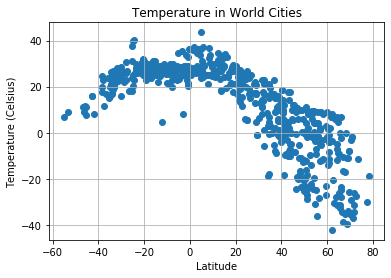

In [126]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Humidity Plot

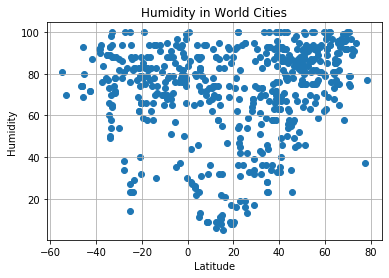

In [106]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

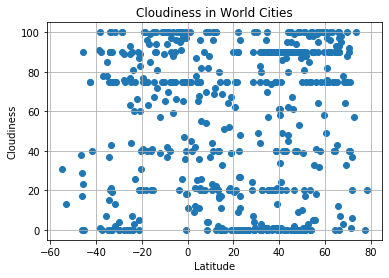

In [107]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

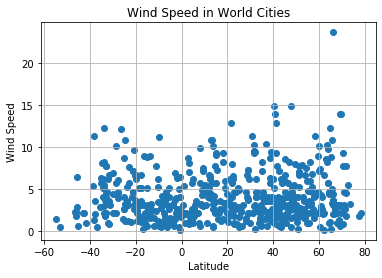

In [108]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [122]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_data.loc[(weather_data['Lat'] >= 0)]
northern.head()


,City,Lat,Lng,Max Temp,Wind Speed,Cloudiness,Humidity
0,laguna,38.42,-121.42,6.11,1.59,1,70
1,clyde river,70.47,-68.59,-29.00,9.30,90,75
4,blagoveshchenka,52.83,79.87,-1.02,7.89,85,86
5,foki,56.69,54.35,-12.22,3.34,100,91
6,kapaa,22.08,-159.32,20.00,5.70,90,100


In [128]:
southern = weather_data.loc[(weather_data['Lat'] < 0)]
southern.head()

,City,Lat,Lng,Max Temp,Wind Speed,Cloudiness,Humidity
2,port elizabeth,-33.92,25.57,19.00,5.10,90,93
3,saint-joseph,-21.37,55.62,30.00,7.20,0,62
10,castro,-24.79,-50.01,20.28,1.22,75,88
13,airai,-8.93,125.41,20.99,0.62,100,95
15,ushuaia,-54.80,-68.30,7.00,1.38,31,81


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.833012150347256


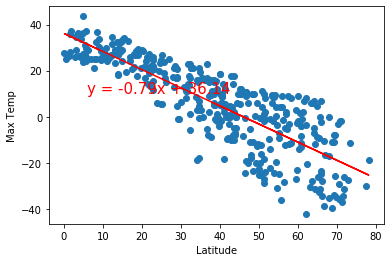

In [127]:
x = northern['Lat']
y = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("../Images/temp_lat_linreg_north.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5500947353281409


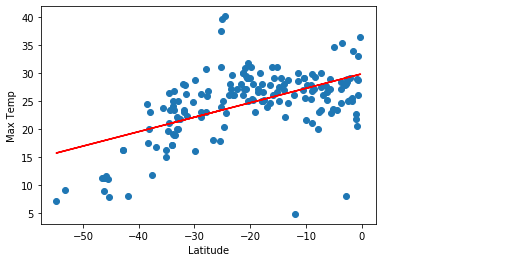

In [139]:
x = southern['Lat']
y = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("../Images/temp_lat_linreg_south.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4437404070864202


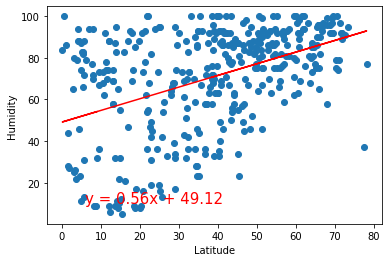

In [132]:
x = northern['Lat']
y = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("../Images/humidity_lat_linreg_north.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.009528854977533228


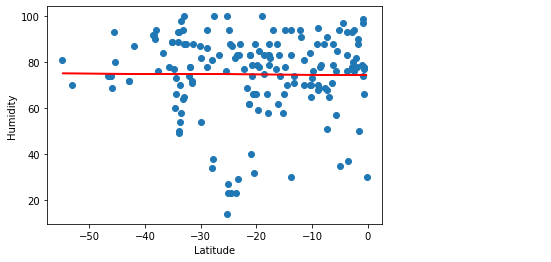

In [133]:
x = southern['Lat']
y = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("../Images/humidity_lat_linreg_south.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2283133159258368


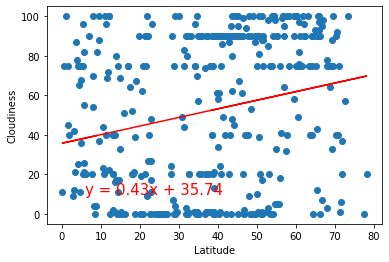

In [134]:
x = northern['Lat']
y = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("../Images/cloudiness_lat_linreg_north.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3110141906882071


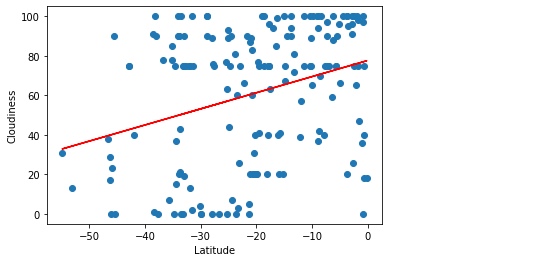

In [136]:
x = southern['Lat']
y = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("../Images/cloudiness_lat_linreg_south.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.055275315310746385


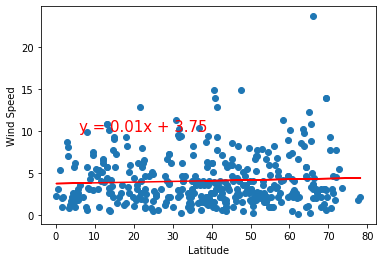

In [137]:
x = northern['Lat']
y = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("../Images/windspeed_lat_linreg_north.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.14339349287379777


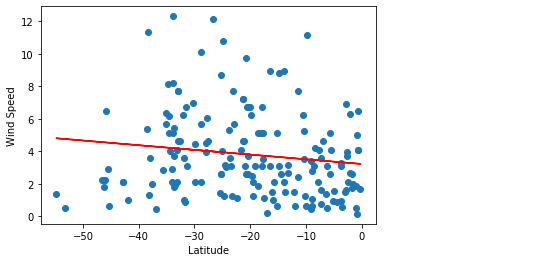

In [138]:
x = southern['Lat']
y = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("../Images/windspeed_lat_linreg_south.png")

In [140]:
weather_data.to_csv('my_weather_data.csv')